# Description of Dataset
Coronavirus disease (**COVID-19**) is an infectious disease caused by the **SARS-CoV-2** virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age.

The best way to prevent and slow down transmission is to be well informed about the disease and how the virus spreads. Protect yourself and others from infection by staying at least 1 metre apart from others, wearing a properly fitted mask, and washing your hands or using an alcohol-based rub frequently. **Get vaccinated when it’s your turn and follow local guidance**.

The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe. These particles range from larger respiratory droplets to smaller aerosols. It is important to practice respiratory etiquette, for example by coughing into a flexed elbow, and to stay home and self-isolate until you recover if you feel unwell.

### Where are cases still high?

Daily global cases fell after a spike in the spring but are now rising again, with the emergence of the **BA.4** and **BA.5** subvariants of the **Omicron** variant.

Studies suggest that Omicron - which quickly became dominant in numerous countries - is milder than the Delta variant, but far more contagious. The subvariants are even more contagious.

# 1. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [2]:
covid = pd.read_csv('covid_worldwide.csv')

# 2.Data Preparation

In [3]:
covid.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [5]:
covid.shape

(231, 8)

In [6]:
covid.describe(include='all')

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,231.000000,231,231,225,210,212,213,228
unique,NaN,231,231,213,210,181,212,228
top,NaN,USA,"104,196,861",38,"101,322,779",0,"78,646","334,805,269"
freq,NaN,1,1,3,1,8,2,1
mean,116.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,66.828138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,58.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,116.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,173.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
covid.index.unique()

RangeIndex(start=0, stop=231, step=1)

# 3. Data Cleaning

From exploring our dataset, we have a better understanding of it and there are few things that need to be tidied before we continue with our analysis.

- drop the `serial number` column.
- replace the `','` with `''` in the columns
- change the data type of the columns
- address null values in the columns
- rename columns


### 3.1 drop the serial number column

Let's drop the serial number column as it is irrelevant to this analysis we will be carrying out.

In [8]:
#create a copy of dataset

covid_copy = covid.copy()

In [9]:
#drop column

covid_copy.drop('Serial Number',axis=1,inplace = True)

In [10]:
covid_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          231 non-null    object
 1   Total Cases      231 non-null    object
 2   Total Deaths     225 non-null    object
 3   Total Recovered  210 non-null    object
 4   Active Cases     212 non-null    object
 5   Total Test       213 non-null    object
 6   Population       228 non-null    object
dtypes: object(7)
memory usage: 12.8+ KB


### 3.2 remove unwanted strings 

some of these columns are strings instead of numbers because of the presence of `','`. We need to remove them before we can convert the datatype to float

In [11]:
col_to_clean = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
       'Total Test', 'Population']

for col in col_to_clean:
    covid_copy[col] = covid_copy[col].str.replace(',', '').astype(float)

### 3.3 remove null values

At this point, let's look for null values in the rows and address them accordingly

<AxesSubplot:ylabel='Country'>

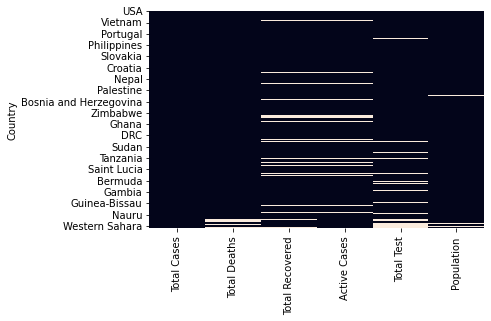

In [12]:
covid_plot = covid_copy.set_index('Country')
sns.heatmap(covid_plot.isnull(),cbar=False) 

From our visualization, we can clearly see which country have missing vlaues and how to work with it. Now lets look at the missing rows in a dataframe

In [13]:
# create boolean mask for missing values
mask = covid_copy.isnull().any(axis=1)

# select only rows with missing values
rows_with_missing_values = covid_copy[mask]

rows_with_missing_values

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
10,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
29,DPRK,4772813.0,74.0,4772739.0,0.0,NaN,25990679.0
65,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
77,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
90,China,503302.0,5272.0,379053.0,118977.0,160000000.0,NaN
94,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
111,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
112,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
113,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
117,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0


Awesome! Now we can clearly see where and Where we have missing values. When dealing with missing data, it is important to address them carefully so as not to compromise the integrity of our final result.

- China, Diamond Princess, and Ms Zaandam have missing populations.

Diamond princess and Ms Zaandam are not countries or territories so we will be dropping them. 
let's use the internet to get the population of this countries

In [14]:
#fill the missing population

covid_copy.loc[90,'Population'] = 1425887337

In [15]:
#drop the diamond princess and ms zaandam columns

covid_copy.drop([226,229],axis=0,inplace = True)

let's check the missing rows in the `test_cases`

In [16]:
covid_copy[covid_copy['Total Test'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
29,DPRK,4772813.0,74.0,4772739.0,0.0,NaN,25990679.0
138,French Polynesia,77957.0,649.0,NaN,NaN,NaN,284164.0
150,Seychelles,50665.0,172.0,50440.0,53.0,NaN,99426.0
156,Tanzania,42664.0,846.0,NaN,NaN,NaN,63298550.0
172,Solomon Islands,24575.0,153.0,NaN,NaN,NaN,721159.0
181,Nicaragua,18491.0,225.0,4225.0,14041.0,NaN,6779100.0
183,Tajikistan,17786.0,125.0,17264.0,397.0,NaN,9957464.0
190,Marshall Islands,15584.0,17.0,15528.0,39.0,NaN,60057.0
203,Comoros,8992.0,161.0,8827.0,4.0,NaN,907419.0
215,Kiribati,5008.0,18.0,2703.0,2287.0,NaN,123419.0


There are many reasons why this country have no entries of total entries. Apart from a possible human error while entering the data, it is possible that covid tests didn't reach this territories or the didnt release that information to the public. 

To address this, we can do either of the following

- drop those rows
- fill the rows with zero
- fill the rows with the mean

if we drop these rows, we may possibly be dropping a huge chunk of our data which will inadvertenetly affect the integrity of our final insight. To be on a safe side, we will assume that this countries didnt recieve the covid test and fill them up with zero

In [17]:
#fill with zero
covid_copy['Total Test'] = covid_copy['Total Test'].fillna(0)

In [18]:
#let's check the total death column for null values

covid_copy[covid_copy['Total Deaths'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
221,Tuvalu,2805.0,NaN,NaN,2805.0,0.0,12066.0
222,Saint Helena,2166.0,NaN,2.0,2164.0,0.0,6115.0
223,Falkland Islands,1930.0,NaN,1930.0,0.0,8632.0,3539.0
225,Niue,747.0,NaN,746.0,1.0,0.0,1622.0
227,Vatican City,29.0,NaN,29.0,0.0,0.0,799.0
230,Tokelau,5.0,NaN,NaN,5.0,0.0,1378.0


There is something interesting to note here.

- `Tokelau` have 5 total cases and 5 active cases so we will have to fill the `total death` and `total recovered` columns with 0. 
- `Vatican city`'s `total deaths` column should be replaced with 0
- As it looks like, we need to replace the rest of these `total deaths` columns with 0 because they don't really have any missing data

In [19]:
#fill with zero

covid_copy['Total Deaths'] = covid_copy['Total Deaths'].fillna(0)

In [20]:
#let's check the Total Recovered column for null values

covid_copy[covid_copy['Total Recovered'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
10,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
65,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
77,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
94,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
111,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
112,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
113,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
117,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0
136,Suriname,82020.0,1398.0,NaN,NaN,239603.0,596831.0
138,French Polynesia,77957.0,649.0,NaN,NaN,0.0,284164.0


In [21]:
#fill tokelau and tuvalu with zero

covid_copy.loc[[221,230],['Total Recovered']] = 0

In [22]:
covid_copy[covid_copy['Total Recovered'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
10,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
65,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
77,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
94,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
111,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
112,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
113,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
117,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0
136,Suriname,82020.0,1398.0,NaN,NaN,239603.0,596831.0
138,French Polynesia,77957.0,649.0,NaN,NaN,0.0,284164.0


We are 75% done with our cleaning, but we still have the missing values in `total recovered` and `active case` columns to worry. At this point, we will need to drop the rest of the countries with missing values because any manipulation we do might compromise the intregrity of our insights

In [23]:
covid_copy.dropna(inplace=True)

In [24]:
#let's check if there are still missing values in our dataset

covid_copy.isnull().sum()

Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

### 3. 4 rename columns

The columns are in capital letters, i am going to rename them to lower case letters.

In [25]:
col_to_rename = {'Country':'country', 'Total Cases':'total_cases', 'Total Deaths':'total_deaths', 
                 'Total Recovered':'total_recovered','Active Cases':'active_cases', 
                 'Total Test':'total_test', 'Population':'population'}

covid_copy.rename(col_to_rename,axis=1,inplace=True)

looks like our cleaning is complete, let's get on with the rest of our analyis.

# 4. Exploratory Analysis

We need to create some new columns that will help us with our analysis.

- `death_rate(%)`

- `recovery_rate(%)`

- `cases_per_capita`

- `death_per_capita`

- `active_cases_per_capita`

In [26]:
covid_copy.columns

Index(['country', 'total_cases', 'total_deaths', 'total_recovered',
       'active_cases', 'total_test', 'population'],
      dtype='object')

In [27]:
#largest population
covid_copy.nlargest(2, columns=['population'])

,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population
90,China,503302.0,5272.0,379053.0,118977.0,160000000.0,1.425887e+09
1,India,44682784.0,530740.0,44150289.0,1755.0,915265788.0,1.406632e+09


In [28]:
#smallest population
covid_copy.nsmallest(2, columns=['population'])

,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population
227,Vatican City,29.0,0.0,29.0,0.0,0.0,799.0
230,Tokelau,5.0,0.0,0.0,5.0,0.0,1378.0


In [29]:
# Add the new columns
covid_copy['death_rate(%)'] = (covid_copy['total_deaths'] / covid_copy['total_cases']) * 100
covid_copy['recovery_rate(%)'] = (covid_copy['total_recovered'] / covid_copy['total_cases']) * 100
covid_copy['incidence_rate'] = (covid_copy['total_cases'] / covid_copy['population']) * 100000

In [30]:
covid_copy.head()

,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population,death_rate(%),recovery_rate(%),incidence_rate
0,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08,1.087302,97.241681,31121.631183
1,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09,1.187795,98.808277,3176.580023
2,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07,0.415524,99.342772,60264.696921
3,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07,0.438623,98.989585,45038.404171
4,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08,1.892958,97.541838,17099.589325


# 5. Insights and Recommendation

Let us identify which countries have the highest numbers of total cases and active cases. This can help us identify which countries are currently experiencing the most severe outbreaks and may require additional resources to manage the pandemic.

## 5.1 Hotspots

Let's identify which countries have the highest number of total cases and active cases. This can help us understand which countries are currently experiencing the most severe outbreaks and may need additional resources to manage the pandemic.

### 5.1.1 Top 10 Countries with the most reported cases

In [31]:
top_10 = covid_copy.nlargest(10,columns = ['total_cases'])
top_10

,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population,death_rate(%),recovery_rate(%),incidence_rate
0,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08,1.087302,97.241681,31121.631183
1,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09,1.187795,98.808277,3176.580023
2,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07,0.415524,99.342772,60264.696921
3,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07,0.438623,98.989585,45038.404171
4,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08,1.892958,97.541838,17099.589325
5,Japan,32588442.0,68399.0,21567425.0,10952618.0,9.214464e+07,1.255848e+08,0.209887,66.181209,25949.344299
6,S. Korea,30197066.0,33486.0,29740877.0,422703.0,1.580406e+07,5.132990e+07,0.110892,98.489294,58829.389086
7,Italy,25453789.0,186833.0,25014986.0,251970.0,2.654782e+08,6.026277e+07,0.734009,98.276080,42238.000344
8,UK,24274361.0,204171.0,24020088.0,50102.0,5.225265e+08,6.849791e+07,0.841097,98.952504,35438.106160
9,Russia,21958696.0,395108.0,21356008.0,207580.0,2.734000e+08,1.458059e+08,1.799324,97.255356,15060.219732


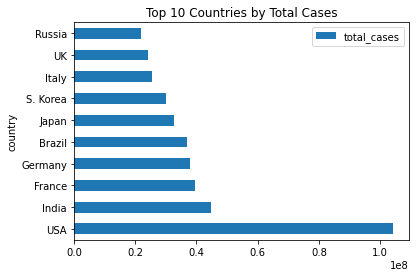

In [32]:
top_10.plot(kind = 'barh', x = 'country', y = 'total_cases', title = 'Top 10 Countries by Total Cases');

let's get the countries with the least number of cases.

In [33]:
bottom_10 = covid_copy.nsmallest(10,columns = ['total_cases'])
bottom_10

,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population,death_rate(%),recovery_rate(%),incidence_rate
230,Tokelau,5.0,0.0,0.0,5.0,0.0,1378.0,0.000000,0.000000,362.844702
228,Western Sahara,10.0,1.0,9.0,0.0,0.0,626161.0,10.000000,90.000000,1.597033
227,Vatican City,29.0,0.0,29.0,0.0,0.0,799.0,0.000000,100.000000,3629.536921
225,Niue,747.0,0.0,746.0,1.0,0.0,1622.0,0.000000,99.866131,46054.254007
224,Montserrat,1403.0,8.0,1376.0,19.0,17762.0,4965.0,0.570207,98.075552,28257.804632
223,Falkland Islands,1930.0,0.0,1930.0,0.0,8632.0,3539.0,0.000000,100.000000,54535.179429
222,Saint Helena,2166.0,0.0,2.0,2164.0,0.0,6115.0,0.000000,0.092336,35421.095666
221,Tuvalu,2805.0,0.0,0.0,2805.0,0.0,12066.0,0.000000,0.000000,23247.140726
220,Wallis and Futuna,3427.0,7.0,438.0,2982.0,20508.0,10982.0,0.204260,12.780858,31205.609179
219,Saint Pierre Miquelon,3452.0,2.0,2449.0,1001.0,25400.0,5759.0,0.057937,70.944380,59940.961973


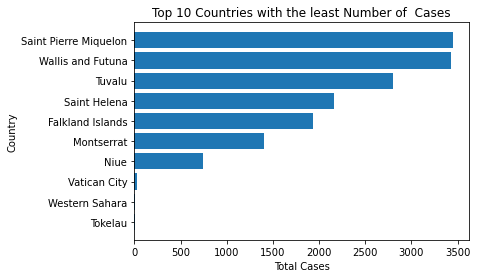

In [34]:
# sort by total cases in ascending order and select the top 10 rows
bottom_10 = covid_copy.sort_values('total_cases').head(10)

# create a bar chart of the top 10 countries
plt.barh(bottom_10['country'], bottom_10['total_cases'])

# set the chart title and axis labels
plt.title('Top 10 Countries with the least Number of  Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')

# display the plot
plt.show()

### 5.1.2 Countries with active cases

In [35]:
most_active = covid_copy.nlargest(10,columns = ['active_cases'])
most_active

,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population,death_rate(%),recovery_rate(%),incidence_rate
5,Japan,32588442.0,68399.0,21567425.0,10952618.0,9.214464e+07,125584838.0,0.209887,66.181209,25949.344299
0,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,334805269.0,1.087302,97.241681,31121.631183
20,Poland,6380225.0,118736.0,5335940.0,925549.0,3.811863e+07,37739785.0,1.861000,83.632474,16905.832929
12,Vietnam,11526508.0,43186.0,10612479.0,870843.0,8.582655e+07,98953541.0,0.374667,92.070200,11648.403770
18,Mexico,7368252.0,332198.0,6606633.0,429421.0,1.935620e+07,131562772.0,4.508505,89.663505,5600.560013
15,Taiwan,9569611.0,16356.0,9129766.0,423489.0,3.020748e+07,23888595.0,0.170916,95.403732,40059.329567
6,S. Korea,30197066.0,33486.0,29740877.0,422703.0,1.580406e+07,51329899.0,0.110892,98.489294,58829.389086
40,Hong Kong,2877280.0,13358.0,2509483.0,354439.0,7.612387e+07,7604299.0,0.464258,87.217198,37837.544263
64,Costa Rica,1186176.0,9158.0,860711.0,316307.0,4.659757e+06,5182354.0,0.772061,72.561829,22888.749013
7,Italy,25453789.0,186833.0,25014986.0,251970.0,2.654782e+08,60262770.0,0.734009,98.276080,42238.000344


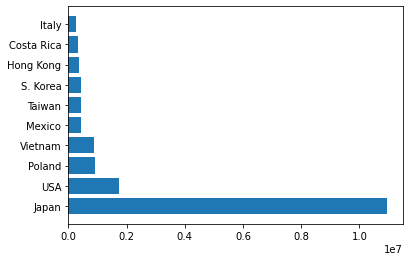

In [36]:
plt.barh(most_active['country'], most_active['active_cases']);

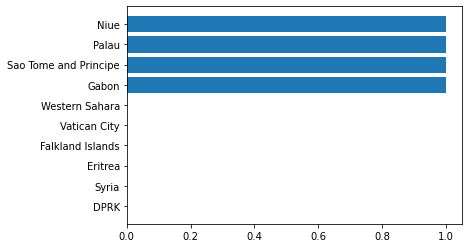

In [37]:
least_active = covid_copy.nsmallest(10,columns = ['active_cases'])
plt.barh(least_active['country'], least_active['active_cases']);

### 5.1.3 Is there correlation between Population of a country and the reported Covid Cases?

This is interesting. Let's find out if the Countries with higher population experience more test cases

In [38]:
covid_copy.corr()['population']

C:\Users\PC\AppData\Local\Temp\ipykernel_5876\994661988.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covid_copy.corr()['population']


total_cases         0.376325
total_deaths        0.414642
total_recovered     0.378609
active_cases        0.077975
total_test          0.542839
population          1.000000
death_rate(%)       0.032142
recovery_rate(%)    0.006004
incidence_rate     -0.140074
Name: population, dtype: float64

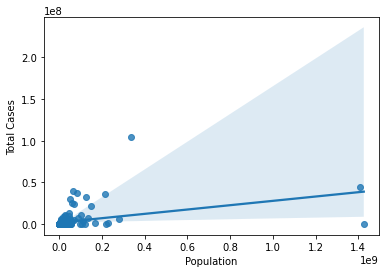

In [39]:
sns.regplot(data=covid_copy, x='population', y='total_cases');
plt.xlabel('Population')
plt.ylabel('Total Cases');

C:\Users\PC\AppData\Local\Temp\ipykernel_5876\902761290.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid_copy.corr(),annot=True );


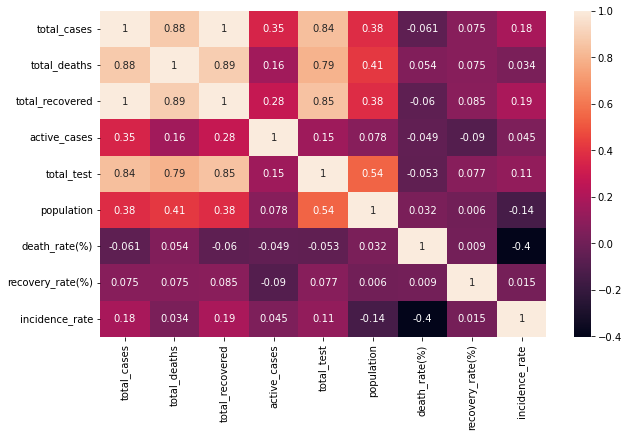

In [40]:
plt.figure(figsize=[10,6])
sns.heatmap(covid_copy.corr(),annot=True );

Although there is a correlation between `population` and `total_cases` in a country, it is still very weak and unrealiable. However, There are strong correlation between the following columns:

- `total_deaths` and `total_cases`
- `total_test` and `total_cases`
- `total_test` and `total_recovered`
- `total_cases` and `total_recovered`
- `total_deaths` and `total_recovered`

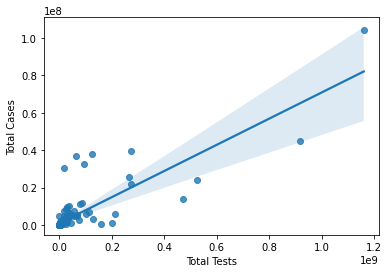

In [41]:
sns.regplot(data=covid_copy, x='total_test', y='total_cases');
plt.xlabel('Total Tests')
plt.ylabel('Total Cases');

There is a pretty strong correleration between Total cases and Total test columns. It looks like more test were carried out in countries with high cases of the pandemic.

There is also a strong correlation between the Total number of cases and deaths. It looks that more people died of the pandemic in countries with high cases of covid-19

## 5.2 Mortality rates
We can calculate the death rate for each country, which is the ratio of total deaths to total cases. This will help us identify which countries have the highest mortality rates and which countries may need additional support in managing the pandemic.

### 5.2 Countries with the most mortality rate

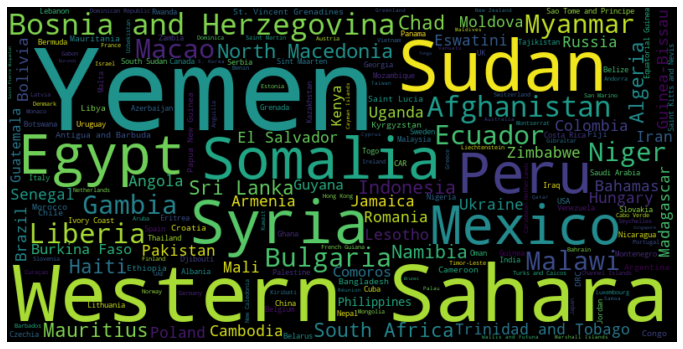

In [42]:
country_death_rate = covid_copy[['country','death_rate(%)']].sort_values('death_rate(%)', ascending=False)
frequencies = country_death_rate.set_index('country')['death_rate(%)'].to_dict()

wordcloud = WordCloud(background_color='black', width=800, height=400).generate_from_frequencies(frequencies)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 5.3 Recovery rates

Let's calculate the recovery rate for each country, which is the ratio of total recoveries to total cases. This can help us understand which countries are doing a better job of treating COVID-19 patients and which healthcare systems are more effective in managing the pandemic.

### 5.3.1 Countries with most recovery rate

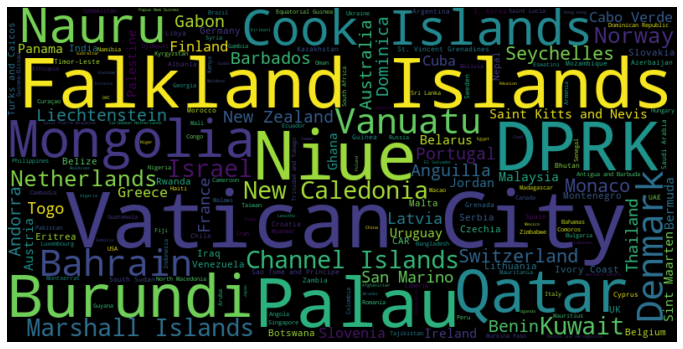

In [43]:
country_death_rate = covid_copy[['country','recovery_rate(%)']].sort_values('recovery_rate(%)', ascending=False)
frequencies = country_death_rate.set_index('country')['recovery_rate(%)'].to_dict()

wordcloud = WordCloud(background_color='black', width=800, height=400).generate_from_frequencies(frequencies)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
covid_copy.nlargest(10,columns=['recovery_rate(%)'])

,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population,death_rate(%),recovery_rate(%),incidence_rate
223,Falkland Islands,1930.0,0.0,1930.0,0.0,8632.0,3539.0,0.000000,100.000000,54535.179429
227,Vatican City,29.0,0.0,29.0,0.0,0.0,799.0,0.000000,100.000000,3629.536921
29,DPRK,4772813.0,74.0,4772739.0,0.0,0.0,25990679.0,0.001550,99.998450,18363.556412
225,Niue,747.0,0.0,746.0,1.0,0.0,1622.0,0.000000,99.866131,46054.254007
213,Palau,5986.0,9.0,5976.0,1.0,68820.0,18233.0,0.150351,99.832944,32830.581912
149,Burundi,53492.0,38.0,53394.0,60.0,345742.0,12624840.0,0.071039,99.816795,423.704380
92,Qatar,492534.0,686.0,491585.0,263.0,4065369.0,2979915.0,0.139280,99.807323,16528.458026
71,Mongolia,1007871.0,2179.0,1005658.0,34.0,4030048.0,3378078.0,0.216198,99.780428,29835.634346
209,Cook Islands,7011.0,2.0,6993.0,16.0,19690.0,17571.0,0.028527,99.743261,39900.973194
216,Nauru,4621.0,1.0,4609.0,11.0,20509.0,10903.0,0.021640,99.740316,42382.830414


## 5.4 Demographic Impact of the Pandemic

Yes, calculating the number of cases and deaths per capita can help identify the demographic impact of COVID-19 on different populations. By dividing the total number of cases and deaths by the population of each country, you can obtain a measure of the relative impact of the disease on different populations.

For example, if Country A has a high number of total cases but also a high population, it may not be as severely affected as Country B, which has a similar number of total cases but a much smaller population. Similarly, if Country C has a high number of total deaths but also a high population, its mortality rate may be lower than Country D, which has a similar number of total deaths but a smaller population.

By calculating the number of cases and deaths per capita, you can also identify which demographic groups may be more vulnerable to the disease. For instance, if a country has a high number of cases and deaths per capita among older adults, this may indicate that this age group is more vulnerable to the disease. Similarly, if a country has a high number of cases and deaths per capita among people with pre-existing conditions, this may indicate that this group is at higher risk.

Analyzing the demographic impact of COVID-19 can help public health officials and policymakers understand which populations are most affected by the disease and target their efforts to protect these groups.

### 5.4.1 Countries with most incidence rate

This measures the number of new cases per population over a certain time period (usually per 100,000 people).  The incidence rate can provide several insights into the spread and impact of COVID-19, such as:

- Severity of the outbreak: The incidence rate can indicate the severity of the COVID-19 outbreak in a particular country or region. Higher incidence rates suggest that the virus is spreading more rapidly in the population, which could result in a higher burden on healthcare systems and potentially more deaths.

In [45]:
covid_copy['population'].max()

1425887337.0

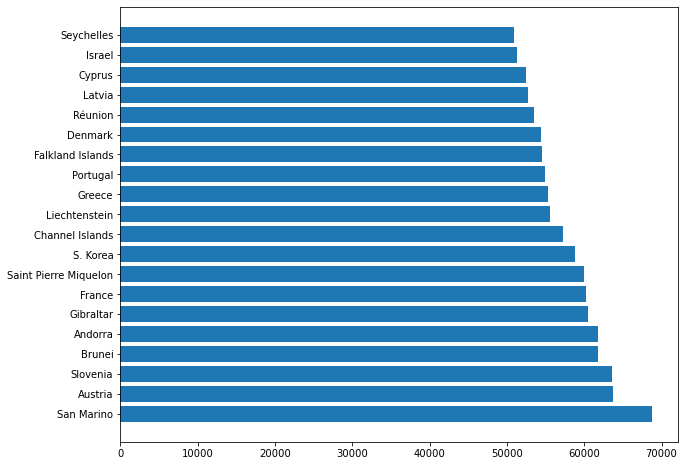

In [46]:
plt.figure(figsize=(10,8))
top_incidence = covid_copy.nlargest(20, columns=['incidence_rate'])
plt.barh(top_incidence['country'], top_incidence['incidence_rate']);

In [47]:
covid_copy.to_csv('covid_copy.csv', index = False, encoding='utf-8')